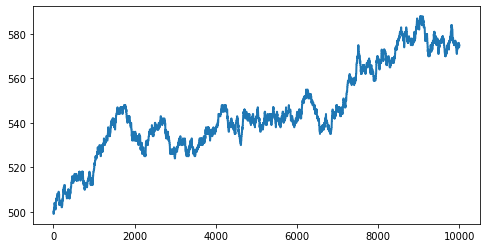

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial values
N = 2000  # maximum population size
a = .5 / N  # birth rate
b = .5 / N  # death rate
nsteps = 10000 # number of iterations

# initialize memory with zeros 
# np.zeros(3) -> array([0., 0., 0.])
x = np.zeros(nsteps) 
# set 
x[0] = N//4

# initialize  memory  with  zeros
for t in range(nsteps - 1):
    if 0 < x[t] < N:
        # Is there a birth?
        birth = np.random.rand() <= a * x[t]
        # Is there a death?
        death = np.random.rand() <= b * x[t]
        # We update the population size.
        x[t+1] = x[t] + 1 * birth - 1 * death
    # The evolution stops if we reach $0$ or $N$.
    else:
        x[t+1] = x[t]
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, lw=2)

Interactive Version
======

In [2]:
# Interactive variant
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
import ipywidgets as widgets
from ipywidgets import interact

# Initial values
N = 2000  # maximum population size
a = .5  # birth probability
b = .5  # death probability
nsteps = 10000
seed = 100

w_a=widgets.FloatSlider(value=a, min=0.05, max=0.95, step=0.01)
w_b=widgets.FloatSlider(value=b, min=0.05, max=0.95, step=0.01)
w_N=widgets.IntSlider(value=N, min=10, max=5000, step=1)
w_nsteps=widgets.IntSlider(value=nsteps, min=1000, max=10000, step=1)
w_seed=widgets.IntSlider(value=seed, min=1, max=200)

@interact(a=w_a, b=w_b, N=w_N, nsteps=w_nsteps, seed=w_seed)
def discrete_markov(a=a, b=b, N=N, nsteps=nsteps, seed=seed):
    # b=1-a
    x = np.zeros(nsteps)
    x[0] = N//4
    rs = RandomState(MT19937(SeedSequence(seed)))
    #prev (x[t-1]) -> transition -> current (x[t])

    for t in range(1, nsteps):
        prev = x[t-1]
        if 0 < prev < N:
            # Is there a birth?
            birth = rs.rand() <= a * prev/N
            # Is there a death?
            death = rs.rand() <= b * prev/N
            # We update the population size.
            x[t] = prev + 1 * birth - 1 * death
        # The evolution stops if we reach $0$ or $N$.
        else:
            x[t] = prev
    display(f"b: {b}")
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x, lw=2)

interactive(children=(FloatSlider(value=0.5, description='a', max=0.95, min=0.05, step=0.01), FloatSlider(valu…